### Introduction
This notebook contains my code for the entire process for EEG data preprocessing, bootstrap sample, and sample selection using Eigespace

## Part 1: Bootstrap sampling for noise reduction and data augemenation
### Loading the raw EEG data from memory

In [ ]:
pip install mne==0.19

In [1]:
import mne
import os
from os.path import abspath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne.time_frequency import psd_welch
from tqdm import tqdm
import itertools
from multiprocessing import Process
file_path=r"/media/kashraf/Elements/summer_2021_research/data_generation/EEG data/Audio"
filename=os.listdir(file_path)
path_montage=r"/media/kashraf/Elements/data_gen_august/data_gen_may_2021/montage"
montage=mne.channels.read_montage(path_montage+"//"+"neuroscan64ch.loc")
raw_data=[]
for file in tqdm(filename):
    files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
    raw_data.append(files)

## Selecting channels to include
good_ch= mne.pick_channels(raw_data[0].info['ch_names'], include=[],
                        exclude=["EKG","EMG",'VEO','HEO','Trigger'])
mne.pick_info(raw_data[0].info,sel=good_ch,copy=False,verbose=False)
for f in tqdm(raw_data):
    mne.pick_info(f.info,sel=good_ch,copy=False)
    f.set_montage(montage)

/home/kashraf/.local/lib/python3.8/site-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/kashraf/.local/lib/python3.8/site-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
  0%|                                                    | 0/11 [00:00<?, ?it/s]/tmp/ipykernel_120841/2408538726.py:17: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  files=mne.

 36%|████████████████                            | 4/11 [00:15<00:26,  3.75s/it]/tmp/ipykernel_120841/2408538726.py:17: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
/tmp/ipykernel_120841/2408538726.py:17: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_isotrak``, or ``read_dig_captrack`` ``read_dig_hpts``, ``read_dig_captrack`` or ``read_custom_montage`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays.
  files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning

 82%|████████████████████████████████████        | 9/11 [00:32<00:07,  3.54s/it]/tmp/ipykernel_120841/2408538726.py:17: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
/tmp/ipykernel_120841/2408538726.py:17: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_isotrak``, or ``read_dig_captrack`` ``read_dig_hpts``, ``read_dig_captrack`` or ``read_custom_montage`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays.
  files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 501.06it/s]


### Epoching
EEG data are stored in terms of epochs. So I had to specify the epoch id that is related to encoding stage of cognitive events for 4 levels of cognitive load.

In [2]:
events= mne.events_from_annotations(raw_data[6])
event_id_encoding={"22":1,"24":2,"26":3,"28":4}

info=raw_data[1].info
import multiprocessing
from tqdm import tqdm

# Create data dictionary to contain EEG data from each CL level
data=dict()
for i in range(len(raw_data)):
    data[i+1]={
    2:mne.Epochs(raw_data[i], events[0], event_id=1).get_data(),
    4:mne.Epochs(raw_data[i], events[0], event_id=2).get_data(),
    6:mne.Epochs(raw_data[i], events[0], event_id=4).get_data(),
    8:mne.Epochs(raw_data[i], events[0], event_id=5).get_data(),
    }

Used Annotations descriptions: ['22', '24', '255', '26', '28', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '51', '52', '62', '64', '66', '68']
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events 

/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-pack

45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matchin

/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-pack

0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epoc

/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-pack

0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epoc

/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-pack

45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matchin

/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-pack

0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epoc

/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-pack

0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epoc

/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-pack

0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped


/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-packages/mne/io/pick.py:360: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pick = np.zeros(nchan, dtype=np.bool)
/home/kashraf/.local/lib/python3.8/site-pack

### Now we extract Single trial data for each cognitive load

In [3]:
cl2_data=np.concatenate([data[sub][2] for sub in data])
cl4_data=np.concatenate([data[sub][4] for sub in data])
cl6_data=np.concatenate([data[sub][6] for sub in data])
cl8_data=np.concatenate([data[sub][8] for sub in data])


In [5]:
np.concatenate(cl2_data).shape

(31680, 176)

#### PCA and choice of components
As part of this work I will use eigenspace created from single trial data to control which samples to keep after bootstrap sampling

In [6]:
from sklearn.decomposition import PCA
pca=PCA()
explained_var2=pca.fit(np.concatenate(cl2_data)).explained_variance_
explained_var4=pca.fit(np.concatenate(cl4_data)).explained_variance_
explained_var6=pca.fit(np.concatenate(cl6_data)).explained_variance_
explained_var8=pca.fit(np.concatenate(cl8_data)).explained_variance_


### I used explained variance variance ratio to find the optimal number of components to keep during PCA computations=====> 75 components seems enough for our data

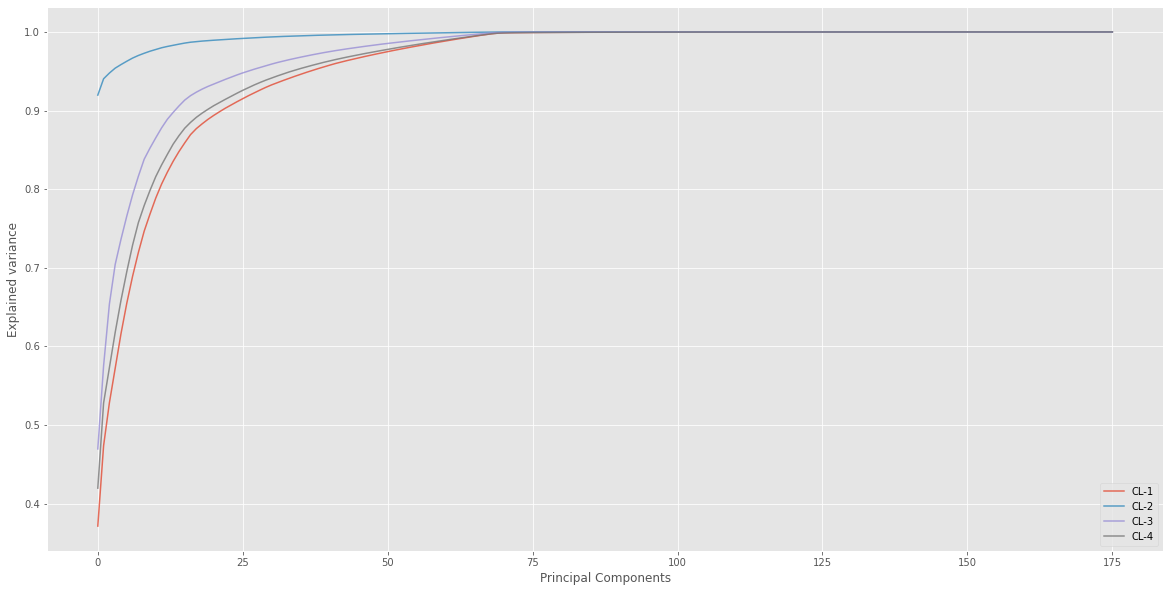

In [11]:
plt.style.use("ggplot")
titles=["CL-1","CL-2","CL-3","CL-4"]
plt.figure(figsize=(20,10))
# fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,12))
plt.plot(np.cumsum(explained_var2/sum(explained_var2)),alpha=0.8)
plt.plot(np.cumsum(explained_var4/sum(explained_var4)),alpha=0.8)
plt.plot(np.cumsum(explained_var6/sum(explained_var6)),alpha=0.8)
plt.plot(np.cumsum(explained_var8/sum(explained_var8)),alpha=0.8)
plt.ylabel("Explained variance")
plt.xlabel("Principal Components")

plt.legend(titles)
# plt.savefig('pca_components.png')


### Bootstrap sampling for noise reduction and data augemenation
Here I select with replacemnet 20 trials from each subject per CL levels and compute the average. I repeate this process 2000 to produce 2000 samples from initial 45 trials. Redundancy in the data will be controlled later using PCA

In [ ]:
from tqdm import tqdm

n_trials= 20# Number of trials to be selected and be averaged out to give one ERP
n_erp= 2000 # Nmber of ERPS required per subject per CL level. So for cL2 we have 1000*11 Erp

def bootstrap(event,trials, n_trials,n_erps):
    erps=[]
    for i in range(n_erps):
        t=np.random.choice(trials,n_trials)
        erp = np.average(event[t],axis=0)
        erps.append(erp)
    return erps
for i in tqdm(range(len(data))):
    data[i+1]["erp2"]=bootstrap(data[i+1][2], data[i+1][2].shape[0],n_trials,n_erp)
    data[i+1]["erp4"]=bootstrap(data[i+1][4], data[i+1][4].shape[0],n_trials,n_erp)
    data[i+1]["erp6"]=bootstrap(data[i+1][6], data[i+1][6].shape[0],n_trials,n_erp)
    data[i+1]["erp8"]=bootstrap(data[i+1][8], data[i+1][8].shape[0],n_trials,n_erp)


In [ ]:
np.save("Sample bootsrap_data from one subject for cl2.pny",data[1]["erp2"])

### Eispace to control redudancy  in generated the data
Here we create eigespace from raw EEG data. THen we project the bootrap data data to this space and reconstruct the signal. Using reconstruction error and interquartile range or 25% to 75% we slected samples that are well represented in original space

In [ ]:

def pca_projection_reconstruction(trial_data,erp_data,n_components):
    pca=PCA(n_components=n_components)
    pca.fit(trial_data)
    eigen_space=pca.components_
    reconstructed=[]
    for erp in erp_data:     
    # Project Erp into these space
        projected_erp=pca.transform(erp)
        recons=np.dot(projected_erp,eigen_space)
        reconstructed.append(recons)
    return np.array(reconstructed)
    

In [ ]:
def generate_rec_error(single_data,erp):
    # generate reconstruction erros for boot strapp sample
    reconstructed=pca_projection_reconstruction(trial_data=single_data,erp_data=erp,n_components=75)
    error=erp-np.array(reconstructed)
    recon_error=[sum(np.linalg.norm(err,axis=1)) for err in error]
    return recon_error
    

### Plotting reconstrcution  error of each sample from eigenspace projection. We will keep sample that fall withing range of 25% to 75%

In [ ]:
error=generate_rec_error(np.concatenate(data[1][8]),data[1]["erp4"])
plt.style.use("ggplot")
plt.figure(figsize=(15,7))
plt.hist(np.log(error))
plt.xlabel("Log reconstruction error"),plt.ylabel("Number of samples")
# plt.show()
plt.savefig("Errorhist.jpg")


In [ ]:
# We generate ID of samples that fall withing the quartile range
def ci_data_selection(errors):
    error=np.log(errors)
    sorted_data=np.sort(error)
    l_limit= np.percentile(sorted_data,25)
    u_limit=np.percentile(sorted_data,75)
    id_selected=[]
    for index , err in enumerate(error):
        if l_limit<=err and err<=u_limit:
            id_selected.append(index)
    return id_selected
    

###### The following codes slectes samples from boostraped data that fall with the range described above

In [ ]:
for sub in tqdm(data):
    rec_error2=generate_rec_error(np.concatenate(data[sub][2]),data[sub]["erp2"])
    index2=ci_data_selection(rec_error2)
    data[sub]["erp2_new"]=np.array(data[sub]["erp2"])[index2]
    
    rec_error4=generate_rec_error(np.concatenate(data[sub][4]),data[sub]["erp4"])
    index4=ci_data_selection(rec_error4)
    data[sub]["erp4_new"]=np.array(data[sub]["erp4"])[index4]
    
    rec_error6=generate_rec_error(np.concatenate(data[sub][6]),data[sub]["erp6"])
    index6=ci_data_selection(rec_error6)
    data[sub]["erp6_new"]=np.array(data[sub]["erp6"])[index6]
    
    rec_error8=generate_rec_error(np.concatenate(data[sub][8]),data[sub]["erp8"])
    index8=ci_data_selection(rec_error8)
    data[sub]["erp8_new"]=np.array(data[sub]["erp8"])[index8]

## Part2: Computing Spatial spectral represenation of the data know as Topomap.
Here I used mne library to to find compute  (1) Mean spectral density (PSD) and (2) project psd values to 64 channel EEG montage

In [ ]:
# FIrst need to be put in MNE array in order to use MNE software functions
for sub in tqdm(data):
    data[sub]["erp2_pca"]=[]
    data[sub]["erp4_pca"]=[]
    data[sub]["erp6_pca"]=[]
    data[sub]["erp8_pca"]=[]
    for i in range(1000):
        erp2=np.reshape(data[sub]["erp2_new"][i],(1,64,176))
        erp2=mne.EpochsArray(erp2,info=raw_data[0].info,verbose=0)
        data[sub]["erp2_pca"].append(erp2)

        erp4=np.reshape(data[sub]["erp4_new"][i],(1,64,176))
        erp4=mne.EpochsArray(erp4,info=raw_data[0].info,verbose=0)
        data[sub]["erp4_pca"].append(erp4)

        erp6=np.reshape(data[sub]["erp6_new"][i],(1,64,176))
        erp6=mne.EpochsArray(erp6,info=raw_data[0].info,verbose=0)
        data[sub]["erp6_pca"].append(erp6)

        erp8=np.reshape(data[sub]["erp8_new"][i],(1,64,176))
        erp8=mne.EpochsArray(erp8,info=raw_data[0].info,verbose=0)
        data[sub]["erp8_pca"].append(erp8)

In [ ]:
# Topomap generator generates topomaps from theta, alpha, and Beta bands
def topo_generator(my_data,band,path):
    if band=="theta":
        cmap="Blues"
        fmin=4
        fmax=7
    elif band=="alpha":
        cmap="Reds"
        fmin=8
        fmax=12
    elif band=="beta":
        cmap="Greens"
        fmin=13
        fmax=30
    psd,freq= mne.time_frequency.psd_welch(my_data, fmin= fmin, fmax=fmax,n_fft=176,verbose=0)
    psd1= np.average(psd,axis=2).flatten()
    fig=mne.viz.plot_topomap( psd1,my_data.info,cmap= cmap, contours=False)
    fig[0].get_figure().savefig(path+".png")  


### Final Step: We generate and save all samples topomaps to the memory
This an computationally expensive process to do so, I used multiprocess to speed up the process 

In [ ]:
from matplotlib import cm
from multiprocessing import Manager
manager=Manager()
data_new=manager.dict()
data_new= data
path_data="/home/kashraf/felix_hd/data_gen_may_2021/Audio_topomaps_June21/theta/cl6//"
# path_cl4_alpha="/home/spring2021/topomap_dataset/visual/recall/704ms/alpha/cl4//"
# path_cl8_beta=r"/home/spring2021/topomap_dataset/704ms/beta/cl8//"

def generation_process(start):
    for sub in tqdm(data_new):
        for j in tqdm(range(200)):
            my_data=data_new[sub]["erp6_pca"][start+j]
            path=path_data+"sub_"+str(sub)+"_theta_"+str(start+j)
            topo_generator(my_data,"theta",path)
            


if __name__=="__main__":
    p1= Process(target=generation_process,args=(0,))
    p2= Process(target=generation_process,args=(200,))
    p3= Process(target=generation_process,args=(400,))
    p4= Process(target=generation_process,args=(600,))
    p5= Process(target=generation_process,args=(800,))
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
   
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    
    print("Done")
    
    
        